In [1]:
import os
os.getcwd()

'C:\\Users\\iqraj\\Documents\\Program\\Assignments\\Week20'

Import all the required packages for logistic regression, manipulating dataframes, plotting and splititng the data into test and train subsets

In [2]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd # For our DataFrame
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import confusion_matrix

In [5]:
data1= pd.read_csv('datasets_228_482_diabetes.csv')

In [6]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#check if there are any missing values

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#Seperate the independent and dependent variables
X=data1.drop('Outcome',axis=1)
y=data1['Outcome']

In [10]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [11]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

#coef_df = pd.DataFrame(model.coef_)
#coef_df['intercept'] = model.intercept_
#print(coef_df)

In [13]:
# Create a DataFrame to hold the coefficients and intercept
coef_df = pd.DataFrame(model.coef_, columns=X.columns)
coef_df['intercept'] = model.intercept_

In [14]:
# Calculate odds ratios
odds_ratios = np.exp(model.coef_[0])

In [15]:
# Add odds ratios to the DataFrame
coef_df.loc[0, 'intercept'] = np.exp(model.intercept_[0])
coef_df.loc[0, 'odds_ratio'] = odds_ratios

ValueError: setting an array element with a sequence.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load the dataset
data = pd.read_csv('datasets_228_482_diabetes.csv')

# Split the data into features and target
X = data.drop(columns='Outcome')
y = data['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model using the liblinear solver
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Predict on test and train datasets
y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

# Create a DataFrame to hold the coefficients
coef_df = pd.DataFrame(model.coef_.T, index=X.columns, columns=['coefficient'])

# Calculate odds ratios and add to DataFrame
coef_df['odds_ratio'] = np.exp(coef_df['coefficient'])

# Display the coefficients and odds ratios
print(coef_df)

# Identify the independent variable with the lowest odds ratio
lowest_odds_ratio_variable = coef_df['odds_ratio'].idxmin()
lowest_odds_ratio_value = coef_df['odds_ratio'].min()

print(f"The independent variable with the lowest odds ratio is: {lowest_odds_ratio_variable}")
print(f"Odds Ratio: {lowest_odds_ratio_value}")

                          coefficient  odds_ratio
Pregnancies                  0.068157    1.070533
Glucose                      0.025656    1.025988
BloodPressure               -0.018348    0.981820
SkinThickness                0.001806    1.001807
Insulin                     -0.000980    0.999020
BMI                          0.063856    1.065939
DiabetesPedigreeFunction     0.440509    1.553497
Age                          0.024041    1.024332
The independent variable with the lowest odds ratio is: BloodPressure
Odds Ratio: 0.9818195559936237


In [12]:
# Add odds ratios to the DataFrame
coef_df.loc[0, 'intercept'] = np.exp(model.intercept_[0])
coef_df.loc[0, 'odds_ratio'] = odds_ratios

# Display the coefficients and odds ratios
print(coef_df)

# Identify the independent variable with the lowest odds ratio
lowest_odds_ratio_variable = X.columns[np.argmin(odds_ratios)]
lowest_odds_ratio_value = odds_ratios.min()

print(f"The independent variable with the lowest odds ratio is: {lowest_odds_ratio_variable}")
print(f"Odds Ratio: {lowest_odds_ratio_value}")

ValueError: setting an array element with a sequence.

In [27]:
# Calculate odds ratios
odds_ratios = pd.Series(coef_df).apply(lambda x: np.exp(x))

# Find the independent variable with the lowest odds ratio
lowest_odds_ratio_variable = X.columns[odds_ratios.argmin()]

print(f"The independent variable with the lowest odds ratio is: {lowest_odds_ratio_variable}")
print(f"Odds Ratio: {odds_ratios.min()}")

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [15]:
model_score = model.score(X_test, y_test)
print(model_score)

0.7727272727272727


<Axes: >

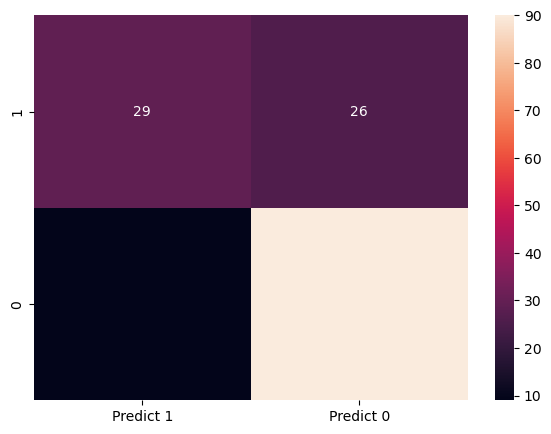

In [16]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 30

True Negatives (TN): we correctly predicted that they don't have diabetes 90

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 9 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 25  Falsely predict negative Type II error

In [17]:
print(metrics.classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       401
           1       0.74      0.54      0.62       213

    accuracy                           0.77       614
   macro avg       0.76      0.72      0.73       614
weighted avg       0.77      0.77      0.76       614



In [18]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.76      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



We can see that the F1 scores , precision and recall are close between test and train datasets and hence there is no issue of overfitting

# Let us now use the Heart dataset

the same packages we used in the diabetes data set will suffice and hence we are not importing them again, However, if you wish to 
replicate this analysis in a seperate jupyter notebook or a session then you have to import the packages mentioned in 
diabetes dataset

In [19]:
data2= pd.read_csv('heart.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

In [20]:
data2.head()

NameError: name 'data2' is not defined

In [21]:
data2.describe()

NameError: name 'data2' is not defined

In [22]:
data2.info()

NameError: name 'data2' is not defined

In [23]:
#Seperate the independent and dependent variables
X=data2.drop('det disease',axis=1)
y=data2['det disease']

NameError: name 'data2' is not defined

In [24]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [25]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1        2         3         4         5         6  \
0  0.118734  0.028684 -0.01891 -0.001954 -0.000213  0.054211  0.476758   

          7  intercept  
0  0.003524  -5.384815  


In [26]:
model_score = model.score(X_test, y_test)
print(model_score)

0.7727272727272727


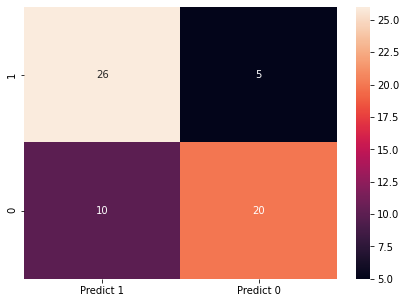

In [44]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)